In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset/weatherHistory.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg

In [3]:
# df = pd.read_csv("/kaggle/input/weather-dataset/weatherHistory.csv")
# df.head()

**Consider the rain as the target 1st**

In [4]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    df.drop(columns = ["Formatted Date","Loud Cover", "Apparent Temperature (C)"], inplace=True)
    mask_humidity = df["Humidity"] > 0.1
    mask_windspeed = df["Wind Speed (km/h)"] < 59
    mask_pressure = df["Pressure (millibars)"] > 800
    
    df = df[mask_humidity & mask_windspeed & mask_pressure]
    
    return df

In [5]:
df = wrangle("/kaggle/input/weather-dataset/weatherHistory.csv")
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [6]:
df.shape

(95142, 9)

look for the columns that have more than 50%null values

In [7]:
df.isnull().sum() / len(df)

Summary                   0.000000
Precip Type               0.005434
Temperature (C)           0.000000
Humidity                  0.000000
Wind Speed (km/h)         0.000000
Wind Bearing (degrees)    0.000000
Visibility (km)           0.000000
Pressure (millibars)      0.000000
Daily Summary             0.000000
dtype: float64

look for low or high cardanlity features

In [8]:
df.nunique()

Summary                     26
Precip Type                  2
Temperature (C)           7568
Humidity                    89
Wind Speed (km/h)         2471
Wind Bearing (degrees)     360
Visibility (km)            949
Pressure (millibars)      4977
Daily Summary              214
dtype: int64

look for the outliers

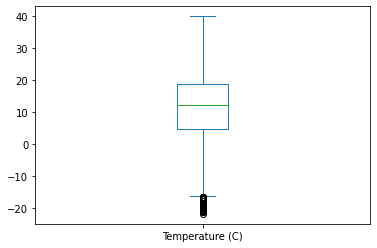

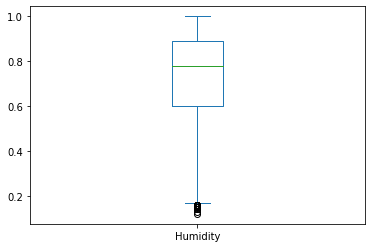

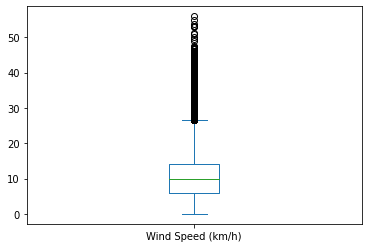

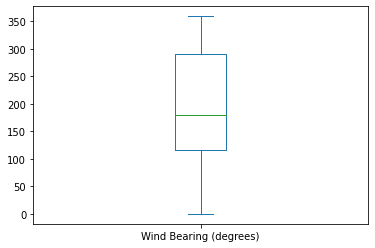

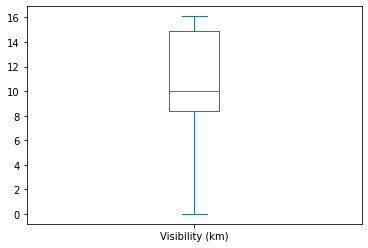

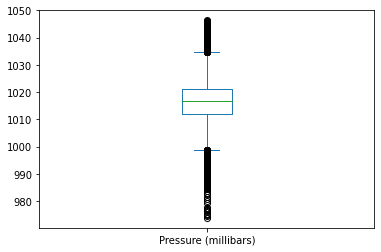

In [9]:
for col in df.columns[2:8]:
    df[col].plot(kind="box")
    plt.show()

<AxesSubplot:>

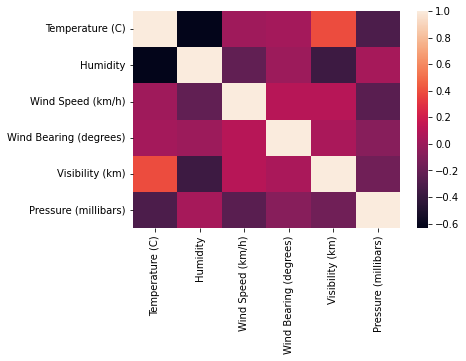

In [10]:
sns.heatmap(df.corr())

In [11]:
df.corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,-0.636691,0.010070,0.030368,0.392261,-0.309894
Humidity,-0.636691,1.000000,-0.224803,0.000992,-0.372174,0.040614
Wind Speed (km/h),0.010070,-0.224803,1.000000,0.101580,0.102858,-0.253649
Wind Bearing (degrees),0.030368,0.000992,0.101580,1.000000,0.047491,-0.078340
Visibility (km),0.392261,-0.372174,0.102858,0.047491,1.000000,-0.166116
Pressure (millibars),-0.309894,0.040614,-0.253649,-0.078340,-0.166116,1.000000
